### 组成图 composition

In [ ]:
饼图、树形图、华夫饼图

In [ ]:
#绘图基本设置，适用于所有图
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

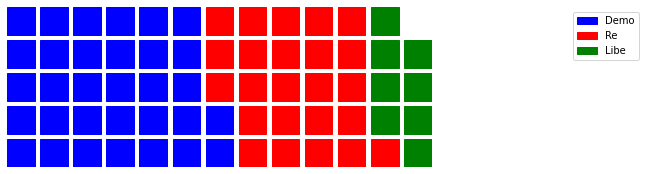

In [2]:
from pywaffle import Waffle  #导入华夫饼库中的华夫饼模块

data={'Demo':32,'Re':24,'Libe':8} #三种类别
f = plt.figure(
        figsize =(10,6),
        FigureClass=Waffle,#图像的类型
        rows=5,#条形图在y轴上的起点
        values=data,#条形图在y轴上的终点
        colors=('b','r','g'),
        legend={'loc':'upper right','bbox_to_anchor':(1.5,1)})#loc表示图里的位置，bbox_to_anchor更精确的考虑位置

In [ ]:
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

#### 华夫饼图 10*10网格

In [ ]:
没有横纵坐标，只有标题和图例，一种颜色一个类别，每个格子表示1%的占比

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.filterwarnings(action='once')

In [ ]:
large = 22
med =16
small=12
params = {'axes.titlesize':large,
         'legend.fontsize':med,
         'figure.figsize':(16,10),
         'axes.labelsize':med,
         'axes.titlesize':med,
         'xtick.labelsize':med,
         'ytick.labelsize':med,
         'figure.titlesize':large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')
%matplotlib inline

In [ ]:
#导入华夫饼模块
from pywaffle import Waffle

In [ ]:
Waffle  

In [ ]:
type(Waffle)

In [ ]:
data={'D':32,'R':24,'l':8}#华夫饼  行数   数据   颜色   图例定位位置
fig = plt.figure(figsize=(8,4),FigureClass=Waffle,rows=5,values=data,
                 colors=('b','r','y'),legend={'loc':'','':''})

In [ ]:
data = {'Democratic':48,'Republican':46,'Libertarian':3}#三种类别
fig = plt.figure(
    figsize=(8,3),
    FigureClass=Waffle, #图像的类型
    rows=5,            #条形图在y轴上的起点，最下边
    values=data,       #条形图在y轴的终点，最上边
    colors=('#232066','#983D3D','#DCB732'),
    legend={'loc':'upper right','bbox_to_anchor':(1.5,1)}#精确的显示图例的位置
)

In [ ]:
#导入数据
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [ ]:
df_raw.head()

In [ ]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
        ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

In [ ]:
df_raw.groupby('class').size().reset_index()

In [ ]:
df_class = df_raw.groupby('class').size().reset_index(name='counts')
df_class

In [ ]:
n_categories = df_class.shape[0]
n_categories

In [ ]:
#使用光谱和列表推导式准备颜色
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

In [ ]:
plt.cm.inferno_r(0.5)

In [ ]:
['{1}'.format(n[0],n[1]) for n in df_class[['class','counts']].itertuples()]

In [ ]:
df_class[['class','counts']]

In [ ]:
[n[1] for n in df_class[['class', 'counts']].itertuples()]

In [ ]:
df_class = df_raw.groupby('class').size().reset_index()

In [ ]:
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]
#colors_class = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)] #更换成了更容易查看的颜色
labels_class = [n[1] for n in df_class[['class', 'counts_class']].itertuples()] #更加简单的写法

#按气缸数量
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]
#colors_cyl = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)]
labels_cyl = ["{1}".format(n[0], n[1]) for n in df_cyl[['cyl', 'counts_cyl']].itertuples()]

#按制造商
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]
#colors_make = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)]
labels_make = ["{1}".format(n[0], n[1]) for n in df_make[['manufacturer', 'counts_make']].itertuples()]

In [ ]:
fig = plt.figure(FigureClass=Waffle,
                plots={
                    '311':{'values':df_class['counts_class'],
                           'labels':labels_class,
                           'legend':{'loc':'upper left','fontsize':12,'title':}}
                })

In [ ]:
#绘图
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': #这里的数字表示，3行，1列，索引为1的图
        {'values': df_class['counts_class'],
         'labels': labels_class,
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
         'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
         'colors': colors_class
        },
        '312': {
            'values': df_cyl['counts_cyl'],
            'labels': labels_cyl,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': df_make['counts_make'],
            'labels': labels_make,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(16, 14),
   # icons='car', icon_size=25, 
   # icon_legend=True
)